In [1]:
import os
from os import path
from pathlib import Path
import pandas as pd
import numpy as np
import re
import glob

In [2]:
with open('data\jl.txt', 'r', encoding="utf8") as file:
    data = file.read().replace('\n', '')

In [3]:
data
data1 = data
data1[:333]

'Jr. Olyvia: 早写完早完事Jimmy (UBC. Jimmy): okok 我已经开了Jimmy (UBC. Jimmy): 我发link给你Jimmy (UBC. Jimmy): 你在zoom么？Jimmy (UBC. Jimmy): 我离开一下阿 你慢慢看Jr. Olyvia: Almost done Jr. Olyvia: 你要我给你看supervised learning 不Jr. Olyvia: 同学 我要写完了Jr. Olyvia: 你能有空帮我看下这个吗Jr. Olyvia: https://jianructose.github.io/all_posts.htmlJr. Olyvia: I know u don’t like read'

In [4]:
# data1.split('Jr')
raw = re.split(":|Jr. Olyvia|Jimmy|\(UBC. Jimmy\)", data1)
raw[:5]

['', '', ' 早写完早完事', ' ', '']

In [5]:
df = pd.DataFrame({"block": np.arange(1, len(raw)+1), "txt": raw})
df.txt = df.txt.replace(['', ' '], np.nan)
df = df.dropna()
strings = df.txt.tolist()
strings

[' 早写完早完事',
 ' okok 我已经开了',
 ' 我发link给你',
 ' 你在zoom么？',
 ' 我离开一下阿 你慢慢看',
 ' Almost done ',
 ' 你要我给你看supervised learning 不',
 ' 同学 我要写完了',
 ' 你能有空帮我看下这个吗',
 ' https',
 '//jianructose.github.io/all_posts.html',
 ' I know u don’t like reading , but this one should be quick',
 ' Ru awake buddy?',
 ' 人类 醒醒',
 ' [Hurt]',
 ' ohhh sorry 我出没了 你写完啦？',
 ' 我给你开zoom吧',
 ' 你醒了',
 ' 不是不是 我没在睡觉',
 ' Do u have personal zoom?',
 ' 我一直都在用personal zoom呀',
 ' 怎么了',
 ' Personal zoom link ',
 ' The permanent one ',
 ' Anyways',
 ' 你开吖',
 ' 我在开了 好着急阿',
 ' hhhh没有 no rush',
 ' I think I’m done finally ',
 ' last minute ',
 ' Thanks!',
 ' Good nite',
 ' 额那那是什么哈哈哈',
 ' expected return',
 ' You subsetted a dataframe no?',
 ' 可能我写的是错的',
 ' Hm well you could have multiple rows that have missing values',
 ' The q is to return the row ',
 ' So return all of them w missing values ',
 ' Yah you first extract the column vector',
 ' And determine the row index at which value is NA',
 ' Then subset df by the row indices',


In [6]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import jieba
from PIL import Image

In [7]:
res = []
for string in strings:
    string = string.strip()
    seg_list = jieba.cut(string)
    res+=list(seg_list)
#     print("Defualt Mode: " + '|'.join(list(seg_list)))
res[:11]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dengj\AppData\Local\Temp\jieba.cache
Loading model cost 0.766 seconds.
Prefix dict has been built successfully.


['早写', '完早', '完事', 'okok', ' ', '我', '已经', '开', '了', '我发', 'link']

In [16]:
import stopwordsiso
from stopwordsiso import stopwords
all_stops = stopwords(['zh', 'en'])
all_stops
# mystops = ['Jr', 'Olyvia', 'UBC', 'Wen', 'Xie', '果丹皮','室', '火猪','天蓬']
# for w in mystops:
#     all_stops = all_stops.add(w)
res_nstp = [w for w in res if not w in all_stops]
res_nstp = [w for w in res_nstp if w != " "]
res_nstp;

In [21]:
# indicate the font path that can display Chinese
font_path = 'fonts/HanyiSentyBubbleTea.ttf'
d=os.getcwd()
d
mask = np.array(Image.open(path.join(d, 'imgs/ariel.jpg')))
# mask
# create coloring from image
image_colors = ImageColorGenerator(mask)


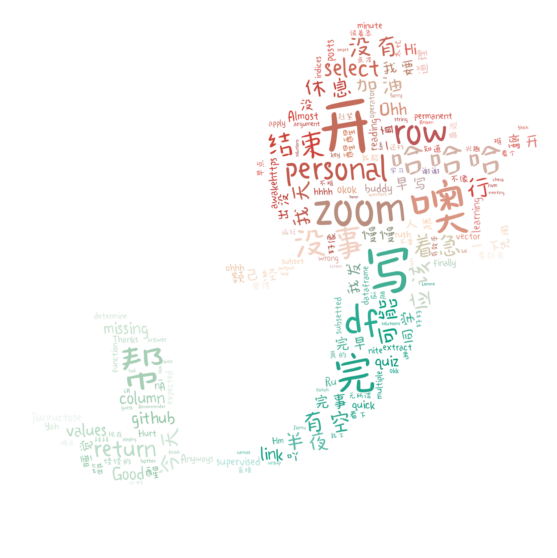

In [26]:
wc = WordCloud(font_path = font_path, mask=mask,
               background_color='white').generate(" ".join(res_nstp))

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()